In [138]:
import numpy as np

In [139]:
from PIL import Image
image = Image.open('/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/erythroblast/ERB_233.jpg')

In [140]:
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
# show the image
image.show()

JPEG
(360, 363)
RGB


uint8
(363, 360, 3)


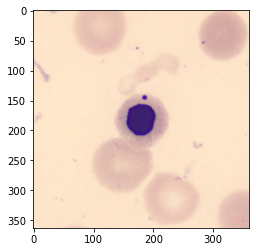

In [171]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread('/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/erythroblast/ERB_233.jpg')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [181]:
# load the image
image = Image.open('/Users/yahiabouzoubaa/Downloads/PBC_dataset_normal_DIB/erythroblast/ERB_233.jpg')
# convert image to numpy array
data =np.asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)


<class 'numpy.ndarray'>
(363, 360, 3)
<class 'PIL.Image.Image'>
RGB
(360, 363)


array([[[255, 229, 202],
        [255, 229, 202],
        [255, 229, 202],
        ...,
        [252, 227, 196],
        [253, 228, 197],
        [254, 229, 198]],

       [[255, 229, 202],
        [255, 229, 202],
        [255, 229, 202],
        ...,
        [251, 226, 196],
        [253, 228, 198],
        [254, 229, 199]],

       [[255, 229, 202],
        [255, 229, 202],
        [255, 229, 202],
        ...,
        [251, 226, 196],
        [252, 227, 197],
        [254, 229, 199]],

       ...,

       [[255, 231, 205],
        [254, 230, 204],
        [254, 230, 204],
        ...,
        [223, 183, 173],
        [223, 183, 173],
        [223, 183, 173]],

       [[255, 231, 205],
        [254, 230, 204],
        [254, 230, 204],
        ...,
        [223, 183, 173],
        [223, 183, 173],
        [223, 183, 173]],

       [[255, 231, 205],
        [254, 230, 204],
        [254, 230, 204],
        ...,
        [223, 183, 173],
        [223, 183, 173],
        [223, 183, 173]]

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io, color, exposure
import skimage

from pathlib import Path
path_name = '/Users/yahiabouzoubaa/Downloads/CSVFILE.csv'
path = Path(path_name)
df = pd.read_csv(path_name)
df.head()

,path,id,label,height,width,mean_brightness
0,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,689200,BA,363,360,196.926051
1,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,883452,BA,363,360,195.410810
2,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,382161,BA,369,366,203.066973
3,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,175579,BA,363,360,198.335374
4,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,775722,BA,363,360,207.585088


In [144]:
sample = df.groupby('label').apply(lambda x: x.sample(n=50)).reset_index(drop = True)
new_df.label.value_counts()


IG          100
LY          100
MO          100
BA          100
BNE         100
PLATELET    100
EO          100
ERB         100
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

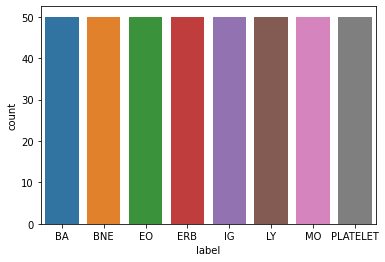

In [145]:
sns.countplot(x=sample.label)

In [146]:
np_data = []
np.random
for i in sample['path']:
    img = np.asarray(Image.open(i).resize((363,360)).convert('L')).reshape(-1)
    np_data.append(img)

In [147]:
np.array(np_data).shape

(400, 130680)

In [148]:
np_data[0]

array([189, 188, 186, ..., 236, 236, 237], dtype=uint8)

In [149]:
np_feats = np.transpose(np_data)

In [150]:
df_data = pd.DataFrame(np_feats)

In [151]:
df_data = df_data.transpose()

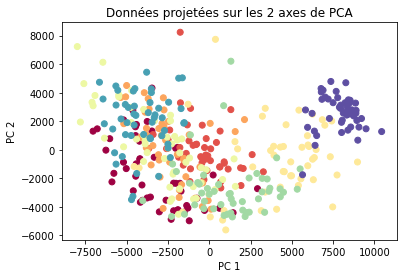

<Figure size 432x288 with 0 Axes>

In [152]:
target = sample.label.replace({'BA':0, 'BNE':1, 'EO':2, 'ERB':3, 'IG':4, 'LY':5, 'MO':6, 'PLATELET':7})
pca = PCA(n_components = 0.9)
X_pca = pca.fit_transform(df_data)
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap=plt.cm.Spectral)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();

fig = plt.figure()





In [132]:
from matplotlib.image import imread
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray_r', prefit = False):
    ax = ax or plt.gca()
    model_ = model(n_components = 0.9)
    proj = model_.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.b')
    
   

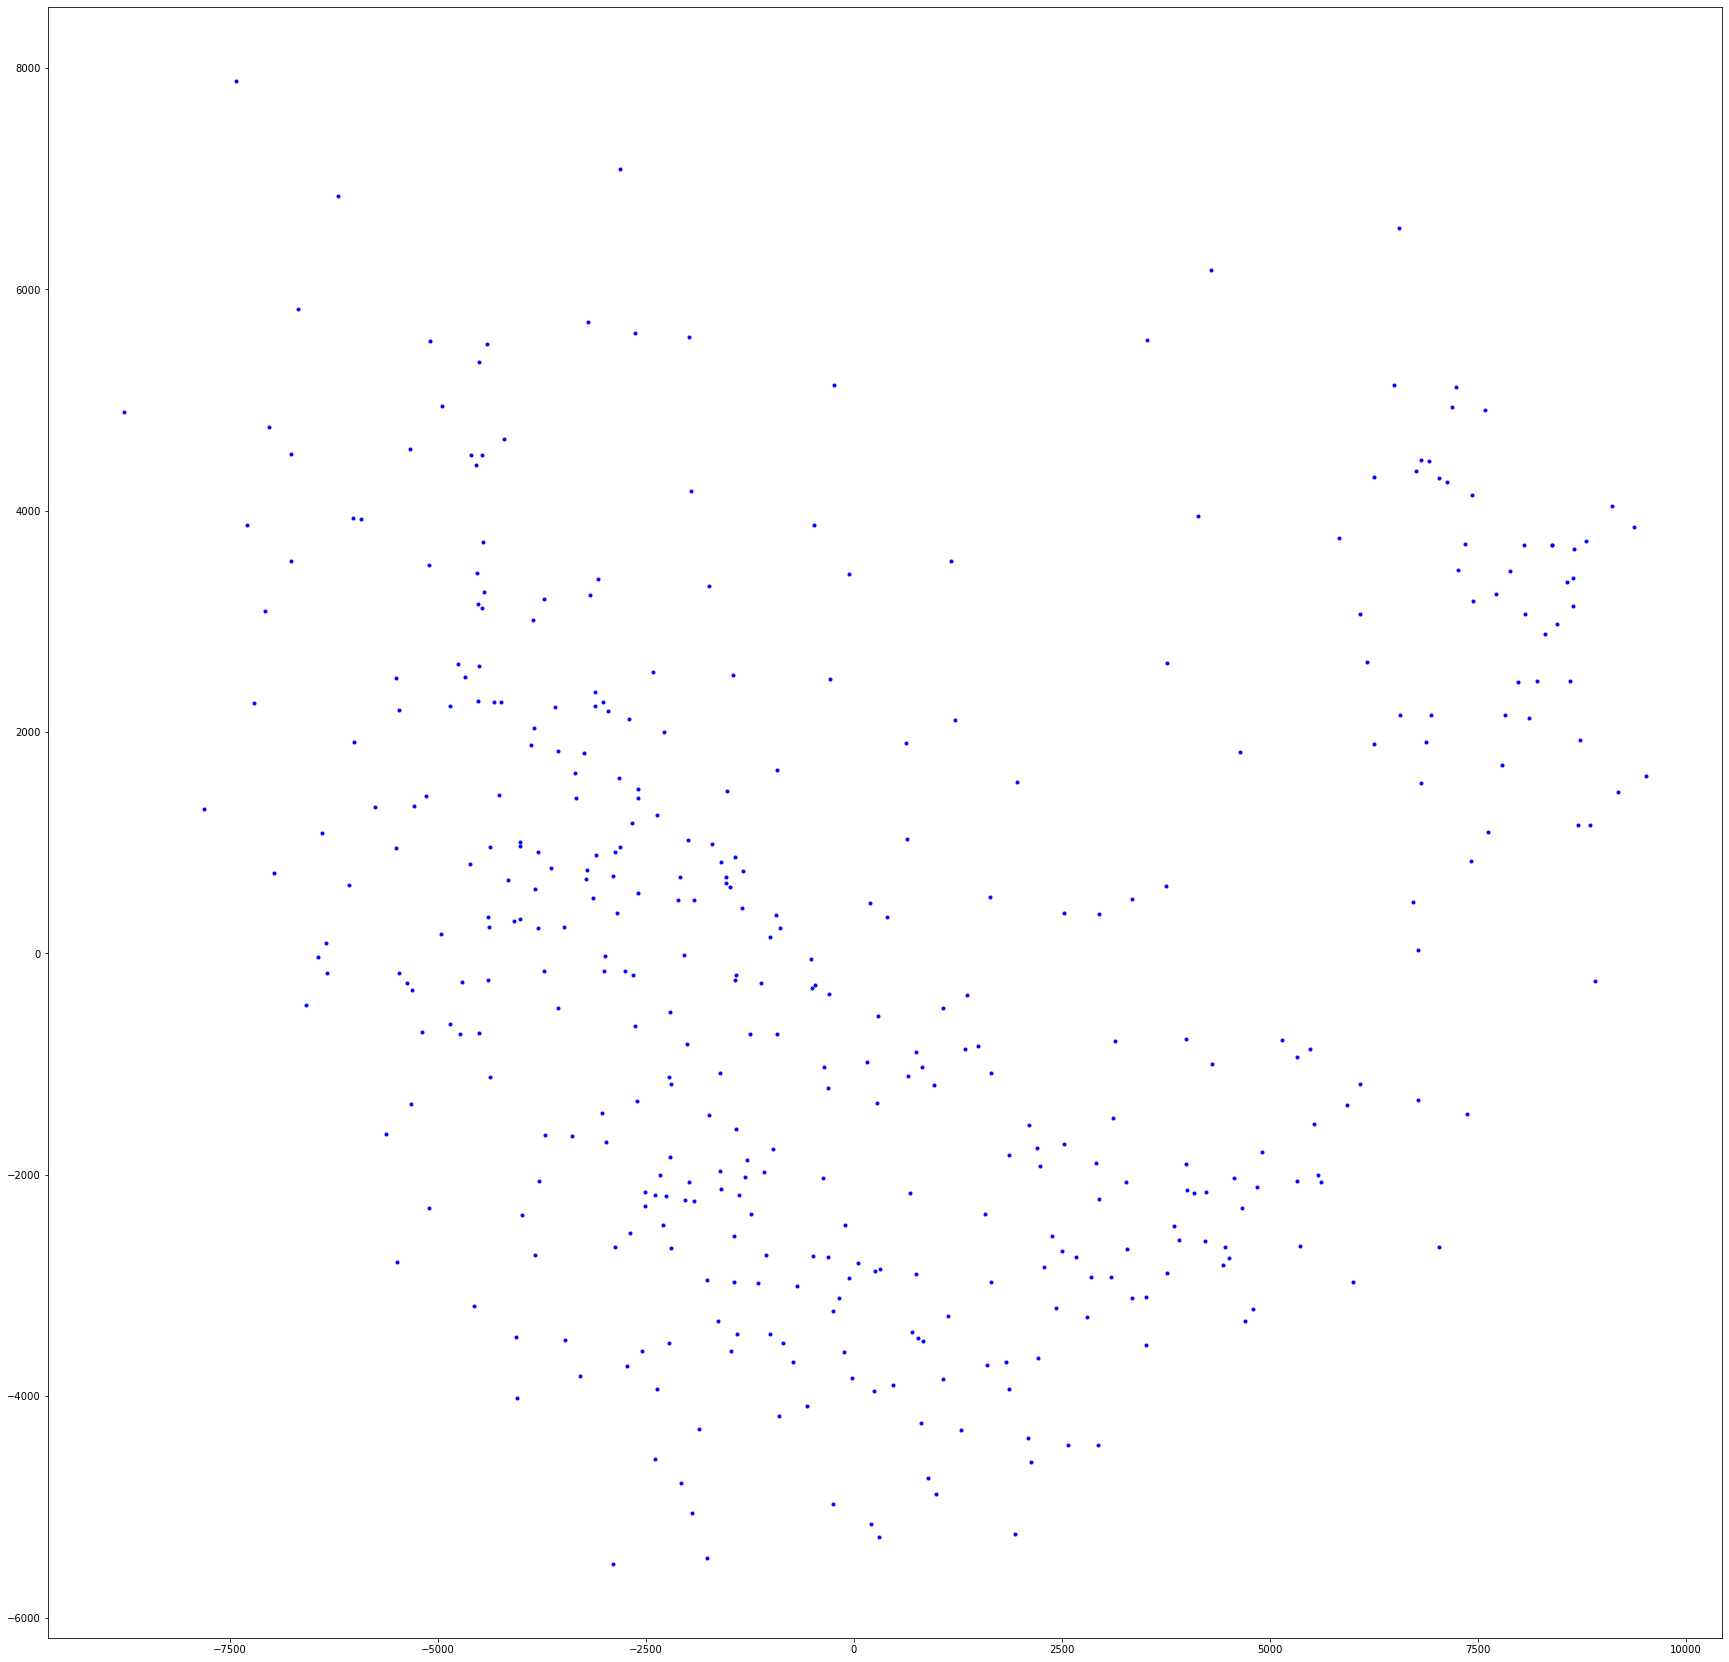

In [133]:
fig, ax = plt.subplots(figsize=(30, 30))


plot_components(df_data, PCA, images=np.array(np_data).reshape((-1, 363, 360)),cmap='gray',thumb_frac=.1)

In [190]:
sample2 = sample.sample(frac=0.25)
sample2

,path,id,label,height,width,mean_brightness
243,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,656824,IG,363,360,199.349393
69,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,106040,BNE,363,360,172.954948
154,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,942700,ERB,363,360,212.199212
133,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,710145,EO,363,360,199.670314
88,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,311422,BNE,363,360,197.517973
...,...,...,...,...,...,...
17,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,35708,BA,363,360,193.570143
296,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,646631,LY,363,360,203.179548
267,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,926291,LY,363,360,200.658660
26,/Users/yahiabouzoubaa/Downloads/PBC_dataset_no...,15551,BA,363,360,191.620980


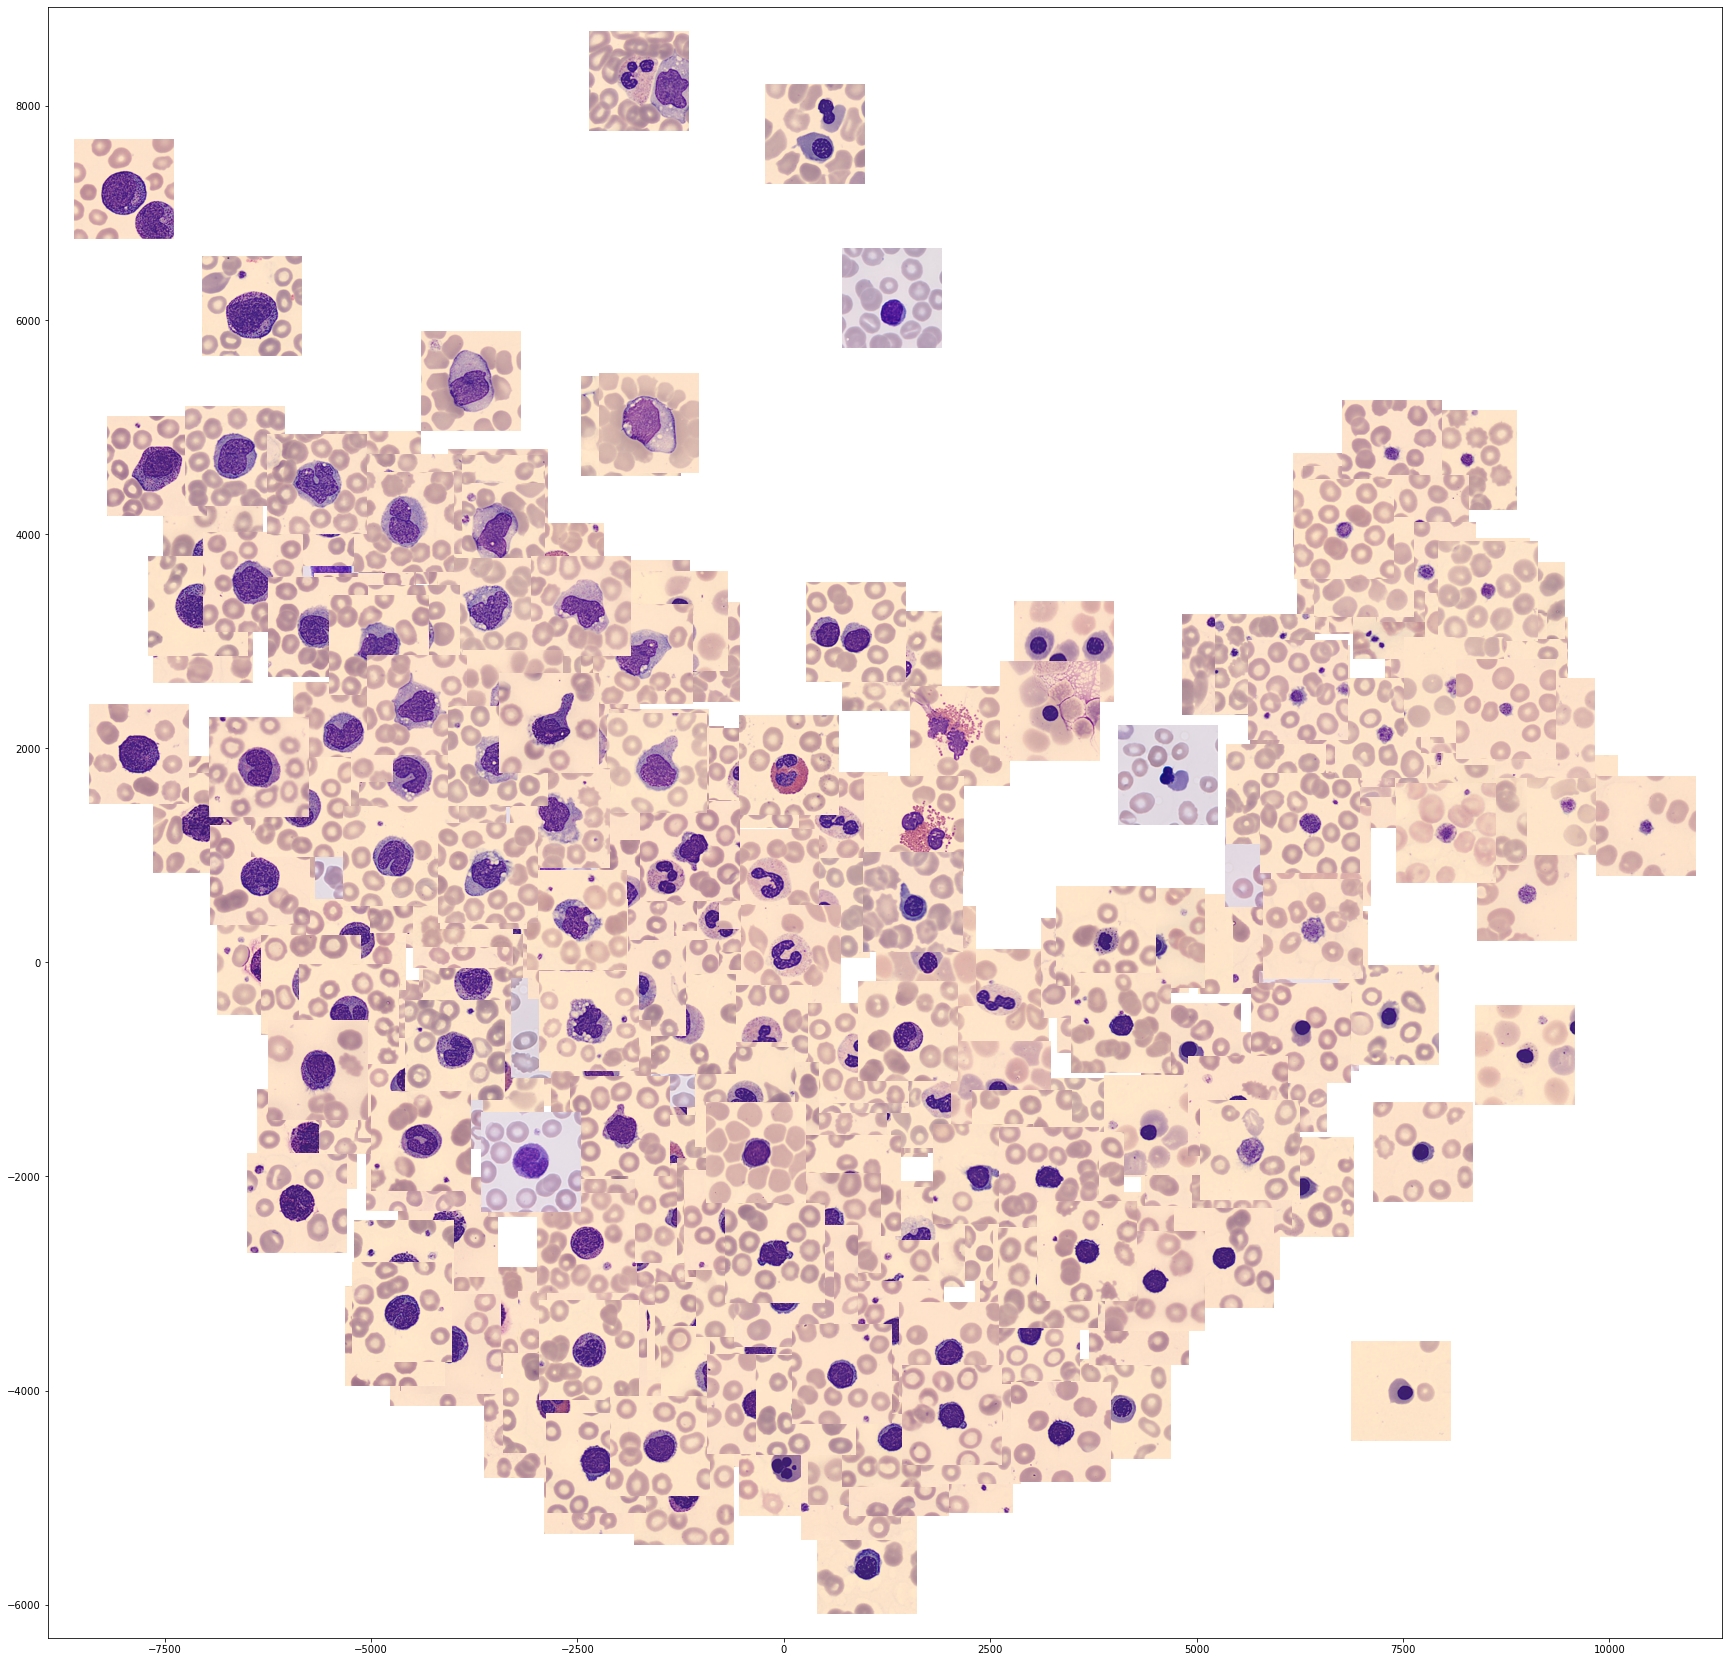

In [195]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(np.asarray(Image.open(path).resize((100,100))))



paths = sample.path

x = X_pca[:, 0]
y = X_pca[:, 1]

fig, ax = plt.subplots(figsize=(30, 30))
ax.scatter(x, y) 

for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

In [162]:
len(X_pca[2])


186

In [159]:
X_pca[1]

186

In [160]:
len(sample.path)

400